In [1]:
import numpy as np

# Test set

In [3]:
from utils import generate_visits

visits =generate_visits(n_installations=4,
                    n_days=7,
                    days=np.arange(7),
                    service_frequencies=np.array([2, 3, 2, 2, 2, 2], dtype=np.int8),
                    )
visits*1


array([[0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0]])

In [15]:
for i in visits:
    print(np.where(i))

[2 3]
[0 3 4]
[2 5]
[0 1]


In [20]:
a = set(np.where(visits)[1].flatten())

In [26]:
a = np.unique(np.where(visits)[1].flatten())

Does not delete inplace

In [34]:
np.delete(a, np.s_[0:5])

array([5])

In [40]:
np.delete(a, a==1)

array([0, 2, 3, 4, 5])

In [31]:
a

array([0, 1, 2, 3, 4, 5])

In [37]:
np.s_[0:5]

TypeError: bad operand type for unary ~: 'slice'

In [41]:
    rng = np.random.default_rng()


In [47]:
import random
random.randint(0, 5)

3

In [50]:
visits*1

array([[0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0]])

In [55]:
visit_days = visits.any(axis=0)
visit_days

array([ True,  True,  True,  True,  True,  True, False])

In [72]:
visit_days.sum()

6

In [87]:
visit_days = np.where(visit_days)[0]
visit_days

array([0, 1, 2, 3, 4, 5])

In [100]:
assignment = rng.choice(np.arange(3), size=len(visit_days))
assignment

array([1, 2, 2, 1, 2, 0])

## TODO: Unit test:

In [101]:
# Check all vessels selected
np.array_equal(np.unique(assignment), np.arange(3))

True

In [ ]:
# Check departure pattern feasible


In [ ]:
# Check that max vessels prepared at installation constraint is satisfied

In [82]:
np.arange(3)

array([0, 1, 2])

In [70]:
idx = rng.choice(np.arange(len(visit_days)), replace=False, size = 3)

idx

array([2, 3, 6])

In [71]:
visit_days[idx]

array([ True,  True, False])

In [18]:
while len(a) != 0:
    a.pop()
    


0

In [19]:
a

{1, 2, 3, 4, 5}

In [6]:
set([1,2,1,5])

{1, 2, 5}

# Test random sampling

In [5]:
rng = np.random.default_rng(12345)

rints = rng.integers(low=0, high=10, size=3)

In [6]:
rints

array([6, 2, 7])

In [51]:
days = [0,1,2,3]

In [26]:
a = rng.choice(days, [5,4])

a

array([[1, 2, 4, 2],
       [3, 2, 4, 2],
       [3, 1, 3, 2],
       [3, 1, 3, 4],
       [2, 1, 1, 4]])

In [52]:
a = np.zeros((4,4), dtype=bool)

In [53]:
a

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [55]:
from utils import generate_visits

In [71]:
generate_visits(n_installations=3,
                n_days=7,
                days=np.arange(7),
                service_frequencies=np.array([1,3,5,3,3,2,2], dtype=np.int8))

array([[False, False, False,  True, False, False, False],
       [False,  True,  True, False, False, False,  True],
       [ True, False, False,  True,  True,  True,  True]])

In [54]:
n_installations = 4
service_frequencies = np.array([2,2,3,2], dtype=np.int8)

for i in range(n_installations):
    index = rng.choice(days, replace=False, size=service_frequencies[i])
    print(index)
    a[i, index] = True
print(a) 

[1 0]
[1 2]
[0 2 1]
[2 0]
[[ True  True False False]
 [False  True  True False]
 [ True  True  True False]
 [ True False  True False]]


In [19]:
days_to_delete = rng.integers(low=0, high=4, size=5)
days_to_delete

array([0, 0, 2, 3, 3])

In [35]:
a[(0,2), (2,2)]

array([4, 3])

In [38]:
a[(0,-1), (1,-1)]

array([2, 4])

# Test utils

In [2]:
from utils import generate_departures_from_routes, generate_visits_from_routes


In [3]:
run test_utils.py

routes:
 [[[1 2 0 0]
  [0 0 0 0]
  [4 3 2 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [3 4 0 0]
  [0 0 0 0]
  [1 2 0 0]]]
out:
visits:
 [[ True False False  True]
 [ True False  True  True]
 [False  True  True False]
 [False  True  True False]]
departures:
 [[ True False  True False]
 [False  True False  True]]


In [4]:
routes

array([[[1, 2, 0, 0],
        [0, 0, 0, 0],
        [4, 3, 2, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [3, 4, 0, 0],
        [0, 0, 0, 0],
        [1, 2, 0, 0]]])

In [5]:
visits*1

array([[1, 0, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0]])

In [6]:
departures*1

array([[1, 0, 1, 0],
       [0, 1, 0, 1]])

In [7]:
np.array_equal(visits.sum(axis=1), np.array([2, 3, 2, 2]))

True

# Port visualize routes

In [8]:
len(visits)

4

# Test constraints

In [9]:
7/3

2.3333333333333335

In [10]:
6/3

2.0

In [16]:
7/4

1.75

In [18]:
7/4

1.75

In [21]:
7/3-1

1.3333333333333335

In [23]:
7//3 -1

1

In [24]:
4//3

1

In [31]:
assert False, "hei" \
"haa"

AssertionError: heihaa

day 1 prev 0
Services not sufficiently spread for  installation 0
routes
[[[1 2 0 0]
  [0 0 0 0]
  [4 3 2 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [3 4 1 0]
  [0 0 0 0]
  [2 0 0 0]]]
visits
[[1 1 0 0]
 [1 0 1 1]
 [0 1 1 0]
 [0 1 1 0]]
departures
[[1 0 1 0]
 [0 1 0 1]]


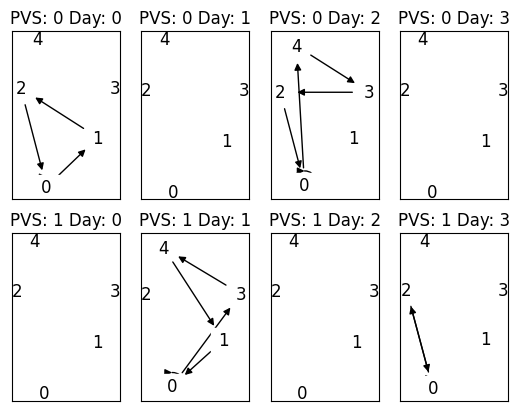

In [7]:
from utils import generate_departures_from_routes, generate_visits_from_routes
from constraints import check_constraints_satisfied
import numpy as np

routes = np.array([[[1, 2, 0, 0],
        [0, 0, 0, 0],
        [4, 3, 2, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [3, 4, 1, 0],
        [0, 0, 0, 0],
        [2, 0, 0, 0]]])
visits = genera
ate_visits_from_routes(routes, n_installations=4, n_days_in_period=4)
departures = generate_departures_from_routes(routes)
check_constraints_satisfied(routes,
                            visits,
                            departures,
                            required_frequencies=np.array([2, 3, 2, 2]),
                            max_v_prepared=np.array([2, 2, 2, 1]),
                            n_days_available=np.array([2, 2]),
                            days_in_period=4,
                            )
from visualize_route import visualize_route
visualize_route(routes, visits, n_days=4)

# Init visits and departures

In [ ]:
departures = np.array([[True, False, True, False],
          [False, True, False, True]])
visits = np.array([[True, False, False, True],
              [True, False, True, True],
              [False, True, True, False],
              [False, True, True, False]])


In [ ]:
max_psv_prepared_per_day = np.array([2,2,0,1])

In [ ]:
np.where(departures.sum(axis=0) > max_psv_prepared_per_day)[0]

In [ ]:
departures*1

In [ ]:
a = np.where(departures)

In [ ]:
a

In [ ]:
a[1][1:] - a[1][:-1]

In [ ]:
a[1][0:2]

In [ ]:
np.array(routes[:, :, 0] > 0, dtype=bool)

In [ ]:
visits = np.array([[1, 1, 1, 1],
                   [1, 0, 0, 1],
                   [1, 0, 1, 1],
                   [0, 1, 1, 0]])